In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
gamma = 1.067
beta = np.sqrt(1- 1/gamma**2)
beta

0.3487732917260593

In [93]:
m_X = 17 # MeV

E_prime = m_X/2
p_prime = np.sqrt((m_X/2)**2 - 0.551**2)


theta = 40 / 180 * np.pi

p_pos_prime = np.array([p_prime * np.cos(theta), p_prime * np.sin(theta)])
p_ele_prime = - p_pos_prime

In [94]:
p_pos = np.array([beta*gamma*E_prime + gamma*p_pos_prime[0], p_pos_prime[1]])
p_ele = np.array([beta*gamma*E_prime + gamma*p_ele_prime[0], p_ele_prime[1]])

<Figure size 360x360 with 0 Axes>

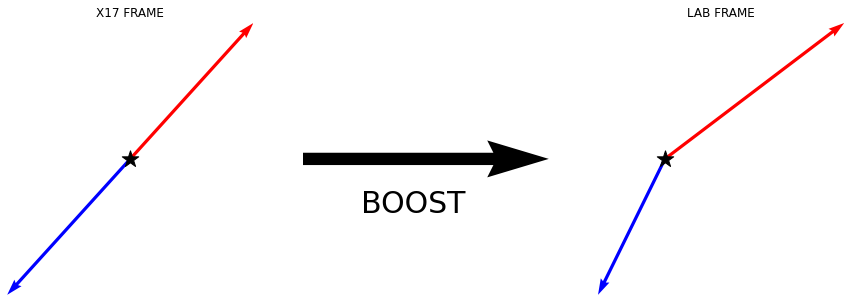

In [95]:
plt.figure(figsize=(5,5))
fig, axs = plt.subplots(1,3,figsize=(15,5))

scale_kwargs = {'angles':'xy', 'scale_units':'xy', 'scale':1}

axs[0].quiver(0, 0, p_pos_prime[0], p_pos_prime[1], color="red", width=0.013, **scale_kwargs)
axs[0].quiver(0, 0, p_ele_prime[0], p_ele_prime[1], color="blue", width=0.013, **scale_kwargs)
axs[0].scatter(0,0,marker="*", c="k", s=300)
axs[0].set_title("X17 FRAME")
axs[0].set_xlim([np.min([p_pos_prime[0],p_ele_prime[0]]), np.max([p_pos_prime[0],p_ele_prime[0]])])
axs[0].set_ylim([np.min([p_pos_prime[1],p_ele_prime[1]]), np.max([p_pos_prime[1],p_ele_prime[1]])])
axs[0].axis("off");

axs[1].quiver(0,0,1,0,color="black", width=0.05, **scale_kwargs)
axs[1].text(0.45,-0.2,"BOOST", fontsize=30, horizontalalignment="center")
axs[1].set_xlim([0,1])
axs[1].set_ylim([-0.5,0.5])
axs[1].axis("off")

axs[2].quiver(0, 0, p_pos[0], p_pos[1], color="red", width=0.013, **scale_kwargs)
axs[2].quiver(0, 0, p_ele[0], p_ele[1], color="blue", width=0.013, **scale_kwargs)
axs[2].scatter(0,0,marker="*", c="k", s=300)
axs[2].set_title("LAB FRAME")
axs[2].set_xlim([np.min([p_pos[0],p_ele[0]]), np.max([p_pos[0],p_ele[0]])])
axs[2].set_ylim([np.min([p_pos[1],p_ele[1]]), np.max([p_pos[1],p_ele[1]])])
axs[2].axis("off");

In [6]:
angle = np.arccos(np.dot(p_pos, p_ele) / (np.linalg.norm(p_pos)*np.linalg.norm(p_ele))) / np.pi * 180
print(f"Correlation angle: {angle:.2f} [deg]")

Correlation angle: 153.03 [deg]


### NOW DO THE SAME FOR A UNIFORM DISTRIBUTION AND OBSERVE THE NEW DISTRIBUTION

In [17]:
num_MC = 10000

theta = np.random.uniform(low = 0, high = np.pi, size= num_MC)

p_pos_prime = np.array([p_prime * np.cos(theta), p_prime * np.sin(theta)])
p_ele_prime = - p_pos_prime

p_pos = np.array([beta*gamma*E_prime + gamma*p_pos_prime[0,:], p_pos_prime[1,:]])
p_ele = np.array([beta*gamma*E_prime + gamma*p_ele_prime[0,:], p_ele_prime[1,:]])

angles = np.arccos(np.diag(np.dot(p_pos.T, p_ele)) / (np.linalg.norm(p_pos,axis=0)*np.linalg.norm(p_ele,axis=0))) / np.pi * 180
angles_uniform = theta / np.pi * 180

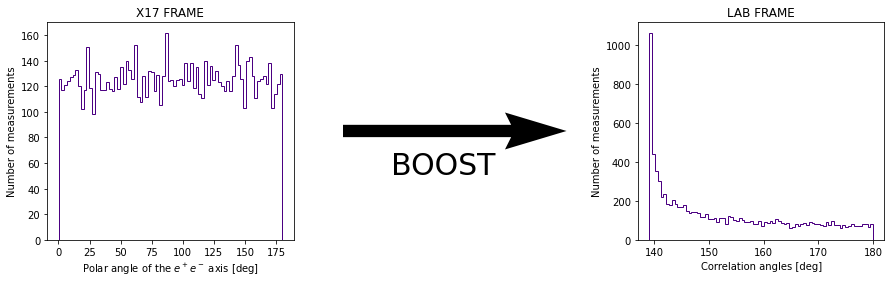

In [18]:
fig, axs = plt.subplots(1,3,figsize=(15,4))

scale_kwargs = {'angles':'xy', 'scale_units':'xy', 'scale':1}

axs[0].hist(angles_uniform, bins=80, histtype="step", color="indigo");
axs[0].set_title("X17 FRAME")
axs[0].set_xlabel(r"Polar angle of the $e^+e^-$ axis [deg]")
axs[0].set_ylabel("Number of measurements")
# axs[0].set_xlim([np.min([p_pos_prime[0],p_ele_prime[0]]), np.max([p_pos_prime[0],p_ele_prime[0]])])
# axs[0].set_ylim([np.min([p_pos_prime[1],p_ele_prime[1]]), np.max([p_pos_prime[1],p_ele_prime[1]])])
# axs[0].axis("off");

axs[1].quiver(0,0,1,0,color="black", width=0.05, **scale_kwargs)
axs[1].text(0.45,-0.2,"BOOST", fontsize=30, horizontalalignment="center")
axs[1].set_xlim([0,1.1])
axs[1].set_ylim([-0.5,0.5])
axs[1].axis("off")

axs[2].hist(angles, bins=80, histtype="step", color="indigo");
axs[2].set_title("LAB FRAME")
axs[2].set_xlabel("Correlation angles [deg]")
axs[2].set_ylabel("Number of measurements");
# axs[2].set_xlim([np.min([p_pos[0],p_ele[0]]), np.max([p_pos[0],p_ele[0]])])
# axs[2].set_ylim([np.min([p_pos[1],p_ele[1]]), np.max([p_pos[1],p_ele[1]])])
# axs[2].axis("off");

### Assume that measurements contain an isotropic decay at rest + X17 decay

In [25]:
angles_experiment = np.concatenate([angles[::20], angles_uniform], axis=0)

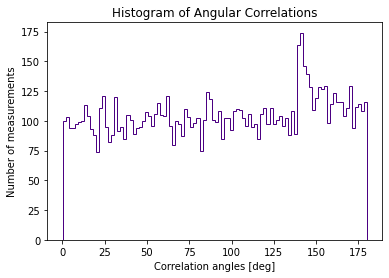

In [75]:
plt.hist(angles_experiment, bins=100, histtype="step", color="indigo");
plt.title("Histogram of Angular Correlations")
plt.xlabel("Correlation angles [deg]")
plt.ylabel("Number of measurements");
# plt.xlim([1,179])

### THE SAME FOR AN ANISOTROPIC DISTRIBUTION AND OBSERVE THE NEW DISTRIBUTION

In [684]:
import scipy.stats as st
from scipy.integrate import quad

class my_pdf(st.rv_continuous):
    """
    https://sci-hub.ru/https://doi.org/10.1016/0029-5582(60)90023-7
    For W(theta) @ 1030 keV
    """
    def _my_pdf(self,x):
        A0 = 1
        A1 = 0.56
        A2 = 0.23
        return A0 + A1*np.cos(x) + A2*(np.cos(x)**2)
    
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # Perform integration in the range we care about
        self.integral, _ = quad(self._my_pdf, self.a, self.b)
    
    
    
    def _pdf(self,x):
        A0 = 1
        A1 = 0.56
        A2 = 0.23
        return self._my_pdf(x) / self.integral# Normalized over its range, in this case [0,1]

my_cv = my_pdf(a=0, b=np.pi+1e-8, name='my_pdf')

In [685]:
angles_anisotropic = my_cv.rvs(size=10000) / np.pi * 180

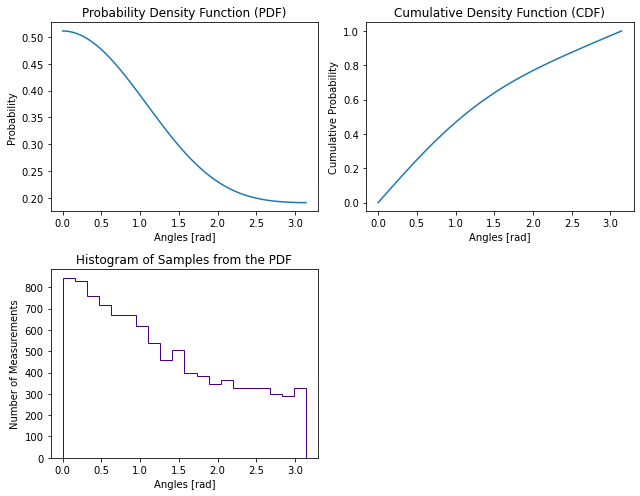

In [686]:
fig, axs = plt.subplots(2,2, figsize=(9,7))


axs[0,0].plot(np.linspace(0,np.pi,100), my_cv.pdf(np.linspace(0,np.pi,100)))
axs[0,0].set_xlabel("Angles [rad]")
axs[0,0].set_ylabel("Probability")
axs[0,0].set_title("Probability Density Function (PDF)")

axs[0,1].plot(np.linspace(0,np.pi,100), my_cv.cdf(np.linspace(0,np.pi,100)))
axs[0,1].set_xlabel("Angles [rad]")
axs[0,1].set_ylabel("Cumulative Probability")
axs[0,1].set_title("Cumulative Density Function (CDF)");

# angles_anisotropic = my_cv.rvs(size=10000) / np.pi * 180
axs[1,0].hist(angles_anisotropic/180*np.pi, bins=20, color="indigo", histtype="step")
axs[1,0].set_xlabel("Angles [rad]")
axs[1,0].set_ylabel("Number of Measurements")
axs[1,0].set_title("Histogram of Samples from the PDF")

axs[1,1].axis("off")

fig.tight_layout();

In [687]:
num_MC = 400

theta = np.random.uniform(low = 0, high = np.pi/2, size= num_MC)
p_pos_prime = np.array([p_prime * np.cos(theta), p_prime * np.sin(theta)])
p_ele_prime = - p_pos_prime
p_pos = np.array([beta*gamma*E_prime + gamma*p_pos_prime[0,:], p_pos_prime[1,:]])
p_ele = np.array([beta*gamma*E_prime + gamma*p_ele_prime[0,:], p_ele_prime[1,:]])
angles = np.arccos(np.diag(np.dot(p_pos.T, p_ele)) / (np.linalg.norm(p_pos,axis=0)*np.linalg.norm(p_ele,axis=0))) / np.pi * 180

# angles_anisotropic = my_cv.rvs(size=10000) / np.pi * 180
angles_experiment = np.concatenate([angles, angles_anisotropic], axis=0)

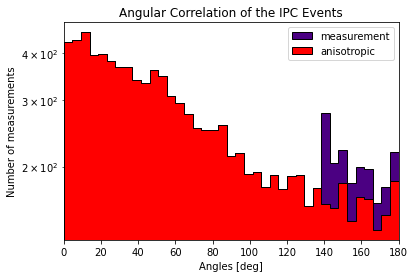

In [694]:
plt.hist(angles_experiment, bins=np.linspace(0,180,40), histtype="stepfilled", color="indigo", edgecolor="k",
         label="measurement", log=(False, True));
plt.hist(angles_anisotropic, bins=np.linspace(0,180,40), histtype="stepfilled", color="red", edgecolor="k",
         label="anisotropic", log=(False, True));
plt.xlim([0,180])
plt.xlabel("Angles [deg]")
plt.ylabel("Number of measurements")
plt.title("Angular Correlation of the IPC Events")
plt.legend();

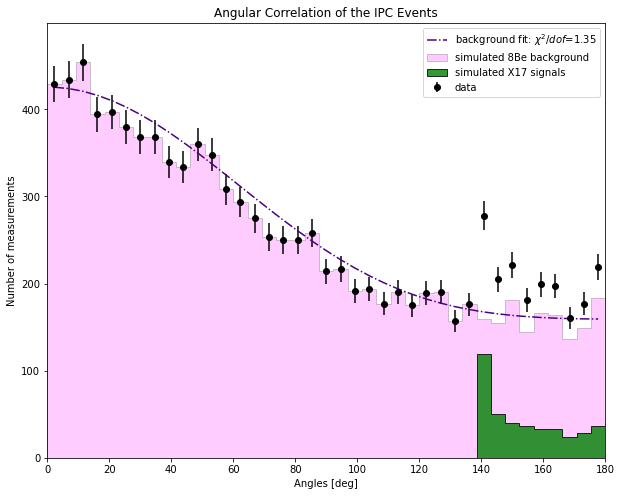

In [770]:
exp_bin_counts, exp_bin_edges = np.histogram(angles_experiment, bins=np.linspace(0,180,nbins))
exp_bin_centres = (exp_bin_edges[:-1] + exp_bin_edges[1:]) / 2

from scipy.optimize import curve_fit
def W_theta(x, A0):
    A1 = 0.56 * A0
    A2 = 0.23 * A0
    return A0 + A1*np.cos(x) + A2*(np.cos(x)**2)

popt, pcov = curve_fit(W_theta, exp_bin_centres[:nbins*2//3], exp_bin_counts[:nbins*2//3])

plt.figure(figsize=(10,8))
plt.errorbar(x=exp_bin_centres, y=exp_bin_counts,
             yerr=np.sqrt(exp_bin_counts), color="k", fmt="o", capsize=0, ecolor="k", label="data");


# Chi-Square Goodness of Fit Test
chi_square_test_statistic, p_value = stats.chisquare(
    exp_bin_counts[:nbins*2//3], W_theta(exp_bin_centres[:nbins*2//3]/180*np.pi, *popt))
chi2_dof = chi_square_test_statistic/exp_bin_counts[:nbins*2//3].size

plt.plot(exp_bin_centres, W_theta(exp_bin_centres/180*np.pi, *popt), linestyle='-.', color="indigo",
         label=f'background fit: $\chi^2/dof$={chi2_dof:.2f}')

plt.hist(angles_anisotropic, bins=np.linspace(0,180,nbins), color="magenta", alpha=0.2,
         edgecolor="k", histtype="stepfilled", label="simulated 8Be background")

plt.hist(angles, bins=np.linspace(0,180,nbins), color="green", alpha=0.8,
         edgecolor="k", histtype="stepfilled", label="simulated X17 signals")


plt.xlim([0,180])
plt.xlabel("Angles [deg]")
plt.ylabel("Number of measurements")
plt.title("Angular Correlation of the IPC Events")
plt.legend();

In [766]:
import scipy.stats as stats

# Chi-Square Goodness of Fit Test
chi_square_test_statistic, p_value = stats.chisquare(
    exp_bin_counts[:nbins*2//3], W_theta(exp_bin_centres[:nbins*2//3]/180*np.pi, *popt))

print(f"{chi_square_test_statistic}, {p_value}")
print(f"chi2/ndof = {chi_square_test_statistic/exp_bin_counts[:nbins*2//3].size}")

35.08594264701722, 0.08665959689688296
chi2/ndof = 1.3494593325775854


### When the fitted background is subtracted

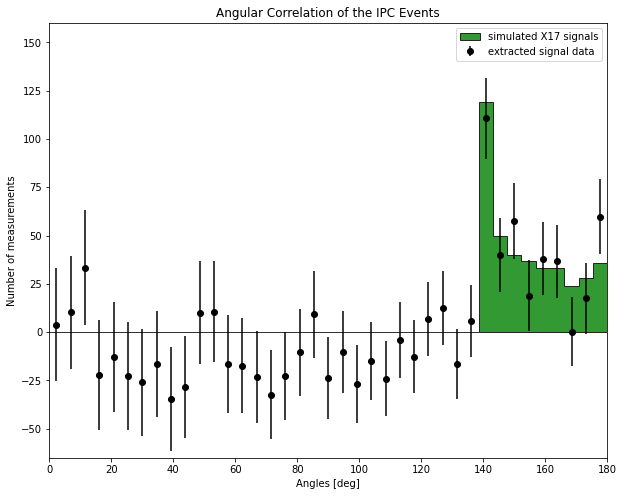

In [789]:
exp_bin_counts, exp_bin_edges = np.histogram(angles_experiment, bins=np.linspace(0,180,nbins))
exp_bin_centres = (exp_bin_edges[:-1] + exp_bin_edges[1:]) / 2

from scipy.optimize import curve_fit
def W_theta(x, A0):
    A1 = 0.56 * A0
    A2 = 0.23 * A0
    return A0 + A1*np.cos(x) + A2*(np.cos(x)**2)

popt, pcov = curve_fit(W_theta, exp_bin_centres[:nbins*2//3], exp_bin_counts[:nbins*2//3])

plt.figure(figsize=(10,8))
plt.errorbar(x=exp_bin_centres, y=exp_bin_counts-W_theta(exp_bin_centres/180*np.pi, *popt),
             yerr=np.sqrt(exp_bin_counts + W_theta(exp_bin_centres/180*np.pi, *popt)), color="k", fmt="o", capsize=0, ecolor="k", label="extracted signal data");


plt.hist(angles, bins=np.linspace(0,180,nbins), color="green", alpha=0.8,
         edgecolor="k", histtype="stepfilled", label="simulated X17 signals")


plt.xlim([0,180])
plt.xlabel("Angles [deg]")
plt.ylabel("Number of measurements")
plt.title("Angular Correlation of the IPC Events")
plt.ylim([-65,160])
plt.legend();

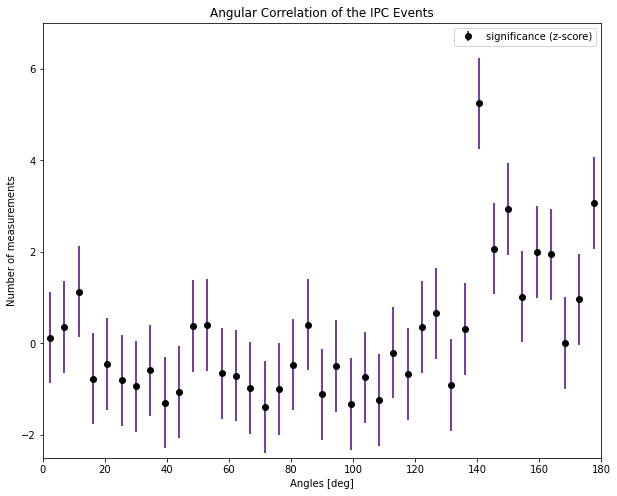

In [799]:
exp_bin_counts, exp_bin_edges = np.histogram(angles_experiment, bins=np.linspace(0,180,nbins))
exp_bin_centres = (exp_bin_edges[:-1] + exp_bin_edges[1:]) / 2

from scipy.optimize import curve_fit
def W_theta(x, A0):
    A1 = 0.56 * A0
    A2 = 0.23 * A0
    return A0 + A1*np.cos(x) + A2*(np.cos(x)**2)

popt, pcov = curve_fit(W_theta, exp_bin_centres[:nbins*2//3], exp_bin_counts[:nbins*2//3])

plt.figure(figsize=(10,8))
plt.errorbar(x=exp_bin_centres, y=(exp_bin_counts-W_theta(exp_bin_centres/180*np.pi, *popt))/np.sqrt(exp_bin_counts + W_theta(exp_bin_centres/180*np.pi, *popt)),
             yerr=1, color="k", fmt="o", capsize=0, ecolor="indigo", label="significance (z-score)");



plt.xlim([0,180])
plt.xlabel("Angles [deg]")
plt.ylabel("Number of measurements")
plt.title("Angular Correlation of the IPC Events")
plt.ylim([-2.5,7])
plt.legend();